In [44]:
#Standard numpy
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import randn
import datetime
import math
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
# Stats
from scipy import stats

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
#So plots appear in Ipython notebook
%matplotlib inline

In [45]:
dataset = pd.read_csv('Machine_ID1_1.csv')

In [46]:
dataset['Month'] = np.zeros(8761)

In [47]:
dataset['Day'] = np.zeros(8761)

In [48]:
dataset['Year'] = np.zeros(8761)

In [49]:
dataset['date'][101].split('-')

['05', '01', '2015']

In [50]:
for i in range(0,8761):
    dataset['Month'][i] = round(int(dataset['date'][i].split('-')[1]),0)
    dataset['Day'][i] = round(int(dataset['date'][i].split('-')[0]),0)
    dataset['Year'][i] = round(int(dataset['date'][i].split('-')[2]),0)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the 

In [51]:
dataset['time'] = dataset.time.astype(int)
dataset['Month'] = dataset.Month.astype(int)
dataset['Day'] = dataset.Day.astype(int)
dataset['Year'] = dataset.Year.astype(int)

In [52]:
X = dataset.iloc[:, [7,8,9,1]].values
y = dataset.iloc[:, [3,4,5,6]].values.round(decimals=3)

In [53]:
X_train, X_test, y_train, y_test= train_test_split(X, y,train_size=6546,shuffle=False)

In [54]:
reg_all = RandomForestRegressor(n_estimators=500,random_state=0)

reg_all.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [55]:
y_test[200:]

array([[151.467, 399.008,  93.774,  33.197],
       [169.643, 552.098, 109.345,  54.759],
       [153.907, 387.214,  95.054,  41.467],
       ...,
       [174.588, 460.505,  95.484,  33.294],
       [184.224, 438.823, 102.694,  46.61 ],
       [191.873, 382.737, 100.894,  37.94 ]])

In [56]:
y_pred_all = reg_all.predict(X_test)
y_pred_all=y_pred_all.round(decimals=3)

In [57]:
y_pred_all[200:]

array([[166.28 , 396.95 ,  95.123,  34.792],
       [171.13 , 419.189, 102.029,  38.546],
       [188.918, 359.405, 100.607,  43.036],
       ...,
       [178.966, 420.657, 102.076,  39.75 ],
       [176.152, 442.859, 102.559,  44.727],
       [176.534, 431.798, 108.103,  42.135]])

In [58]:
import random
y_pred_all[0]

array([168.906, 422.905,  92.996,  50.882])

In [59]:
x_g=y_pred_all[:,3][:200]

In [60]:
y_g=y_test[:,3][:200]

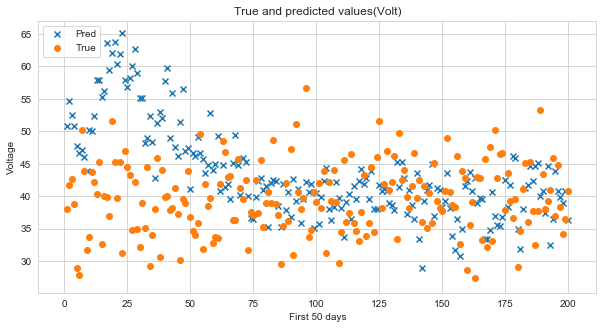

In [61]:
plt.figure(figsize=(10,5))
plt.scatter(x=np.arange(1,201),y=x_g,marker='x',label='Pred')
plt.scatter(x=np.arange(1,201),y=y_g,marker='o',label='True')
plt.legend(loc='upper left')
plt.title('True and predicted values(Volt)')
plt.xlabel('First 50 days')
plt.ylabel('Voltage')
plt.show()

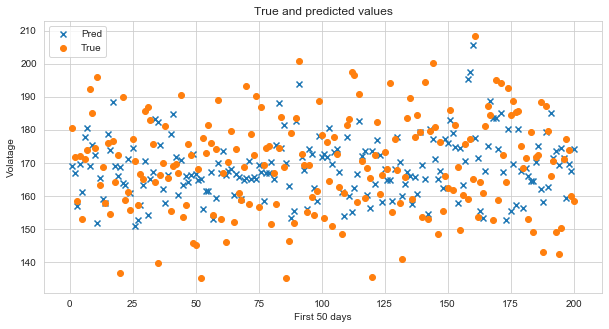

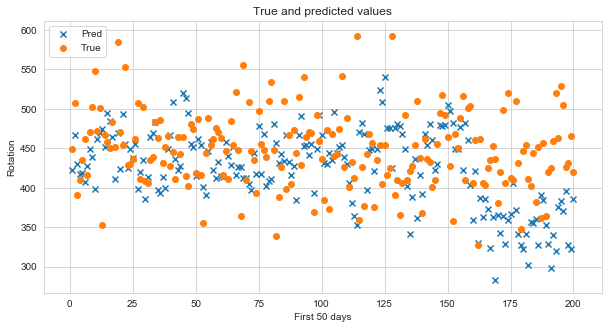

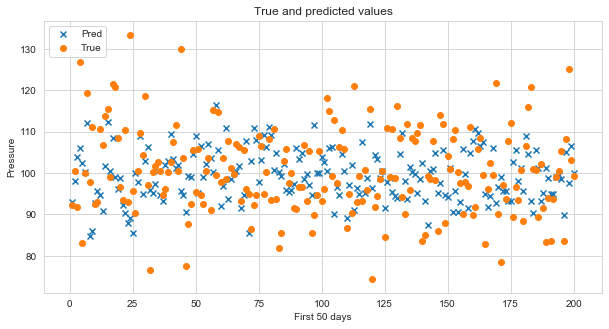

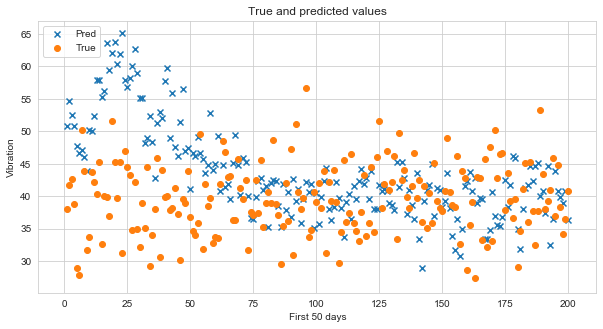

In [62]:
labls= ['Volatage','Rotation','Pressure','Vibration']
for i in range(1,5):
    x_g=y_pred_all[:,i-1][:200]
    y_g=y_test[:,i-1][:200]
    
    plt.figure(figsize=(10,5))
    plt.scatter(x=np.arange(1,201),y=x_g,marker='x',label='Pred')
    plt.scatter(x=np.arange(1,201),y=y_g,marker='o',label='True')
    plt.legend(loc='upper left')
    plt.title('True and predicted values')
    plt.xlabel('First 50 days')
    plt.ylabel(labls[i-1])
    plt.show()

In [63]:
math.sqrt(mean_squared_error(y_test, y_pred_all))

38.013792367970154

In [64]:
# Calculate the absolute errors
errors_all = abs(y_pred_all - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors_all), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape_all = 100 * (errors_all / y_test)
# Calculate and display accuracy
accuracy_all = 100 - np.mean(mape_all)
print('Accuracy:', round(accuracy_all, 2), '%.')

Mean Absolute Error: 22.0 degrees.
Accuracy: 88.5 %.


In [65]:
X_pres = dataset.iloc[:, [7,8,9,1]].values
y_pres = dataset.iloc[:, [5]].values.round(decimals=3)

In [ ]:
X_volt = dataset.iloc[:, [7,8,9,1]].values
y_volt = dataset.iloc[:, [3]].values.round(decimals=3)

In [ ]:
X_vib = dataset.iloc[:, [7,8,9,1]].values
y_vib = dataset.iloc[:, [6]].values.round(decimals=3)

In [ ]:
X_rot = dataset.iloc[:, [7,8,9,1]].values
y_rot = dataset.iloc[:, [4]].values.round(decimals=3)

In [ ]:
y_rot

In [ ]:
X_volt_train, X_volt_test, y_volt_train, y_volt_test= train_test_split(X_volt, y_volt,train_size=6546,shuffle=False)

In [ ]:
X_rot_train, X_rot_test, y_rot_train, y_rot_test= train_test_split(X_rot, y_rot,train_size=6546,shuffle=False)

In [ ]:
X_pres_train, X_pres_test, y_pres_train, y_pres_test= train_test_split(X_pres, y_pres,train_size=6546,shuffle=False)

In [ ]:
X_vib_train, X_vib_test, y_vib_train, y_vib_test= train_test_split(X_vib, y_vib,train_size=6546,shuffle=False)

In [ ]:
X_vib_test.shape

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
reg = RandomForestRegressor(n_estimators=500,random_state=0)

In [ ]:
reg.fit(X_volt_train, np.ravel(y_volt_train))

In [ ]:

y_pred = reg.predict(X_volt_test)
y_pred

In [ ]:
reg_rot = RandomForestRegressor(n_estimators=500,random_state=0)

reg_rot.fit(X_rot_train, np.ravel(y_rot_train))

In [ ]:
reg_pres = RandomForestRegressor(n_estimators=500,random_state=0)

reg_pres.fit(X_pres_train, np.ravel(y_pres_train))

In [ ]:
reg_vib = RandomForestRegressor(n_estimators=500,random_state=0)

reg_vib.fit(X_vib_train, np.ravel(y_vib_train))

In [ ]:
y_rot_pred = reg_rot.predict(X_rot_test)
y_rot_pred

In [ ]:
y_pres_pred = reg_pres.predict(X_pres_test)
y_pres_pred

In [ ]:
y_vib_pred = reg_vib.predict(X_vib_test)
y_vib_pred

In [ ]:
y_rot_test

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:

math.sqrt(mean_squared_error(y_volt_test, y_pred))

In [ ]:
import math
math.sqrt(mean_squared_error(y_rot_test, y_rot_pred))

In [ ]:
math.sqrt(mean_squared_error(y_pres_test, y_pres_pred))

In [ ]:
math.sqrt(mean_squared_error(y_vib_test, y_vib_pred))

In [ ]:
# Calculate the absolute errors
errors = abs(y_pred - y_volt_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_volt_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

In [ ]:
#Checking accuracy for the rotation

In [ ]:
# Calculate the absolute errors
errors_rot = abs(y_rot_pred - y_rot_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors_rot), 2), 'degrees.')

In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape_rot = 100 * (errors_rot / y_rot_test)
# Calculate and display accuracy
accuracy_rot = 100 - np.mean(mape_rot)
print('Accuracy:', round(accuracy_rot, 2), '%.')

In [ ]:
# Calculate the absolute errors
errors_pres = abs(y_pres_pred - y_pres_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors_pres), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape_pres = 100 * (errors_pres / y_pres_test)
# Calculate and display accuracy
accuracy_pres = 100 - np.mean(mape_pres)
print('Accuracy:', round(accuracy_pres, 2), '%.')

In [ ]:
# Calculate the absolute errors
errors_vib = abs(y_vib_pred - y_vib_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors_vib), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape_vib = 100 * (errors_vib / y_vib_test)
# Calculate and display accuracy
accuracy_vib = 100 - np.mean(mape_vib)
print('Accuracy:', round(accuracy_vib, 2), '%.')